<a href="https://colab.research.google.com/github/raulbenitez/PIB/blob/main/Reconeixement_objectes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tècniques de reconeixement d'objectes amb intel.ligència artificial

# 1. Generate an image with symbols with different shapes and sizes:

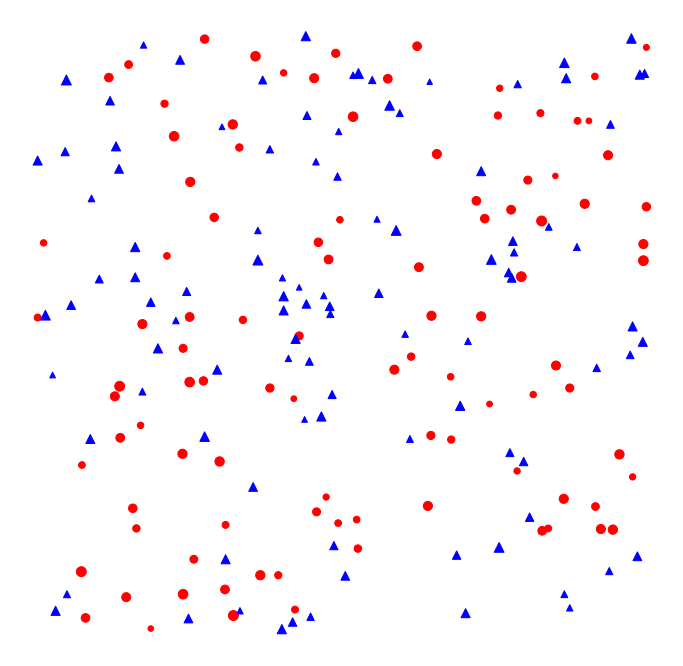

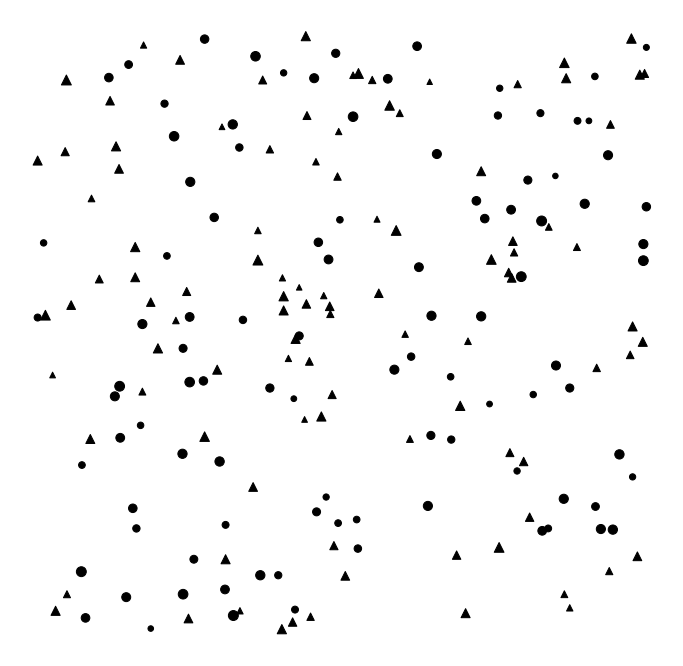

In [1]:
import numpy as np 
np.random.seed(13)

import matplotlib.pyplot as plt 
Isize = 1024
N = 100

X = np.random.randint(Isize, size=(2,2*N)) # random placement of objects

symsizes1 = np.random.randint(30,100,size=(1,N))
symsizes2 = np.random.randint(30,100,size=(1,N))

# Color image:
fig = plt.figure(figsize=(12,12))
plt.scatter(X[0,0:N-1], X[1,0:N-1], s=symsizes1[0,0:N-1], c='r',edgecolor="red",marker = 'o')
plt.scatter(X[0,N:2*N], X[1,N:2*N], s=symsizes1[0,0:N], c='b',edgecolor="blue",marker = '^')
plt.axis('off')
plt.savefig('Patterns_RGB.png',dpi=600, facecolor='w',optimize=False,bbox_inches='tight')
plt.show()

# B&W image:
fig = plt.figure(figsize=(12,12))
plt.scatter(X[0,0:N-1], X[1,0:N-1], s=symsizes1[0,0:N-1], c='k',edgecolor="black",marker = 'o')
plt.scatter(X[0,N:2*N], X[1,N:2*N], s=symsizes1[0,0:N], c='k',edgecolor="black",marker = '^')
plt.axis('off')
plt.savefig('Patterns_BW.png',dpi=600, facecolor='w',optimize=False,bbox_inches='tight')
plt.show()

# 2. Load the image: 

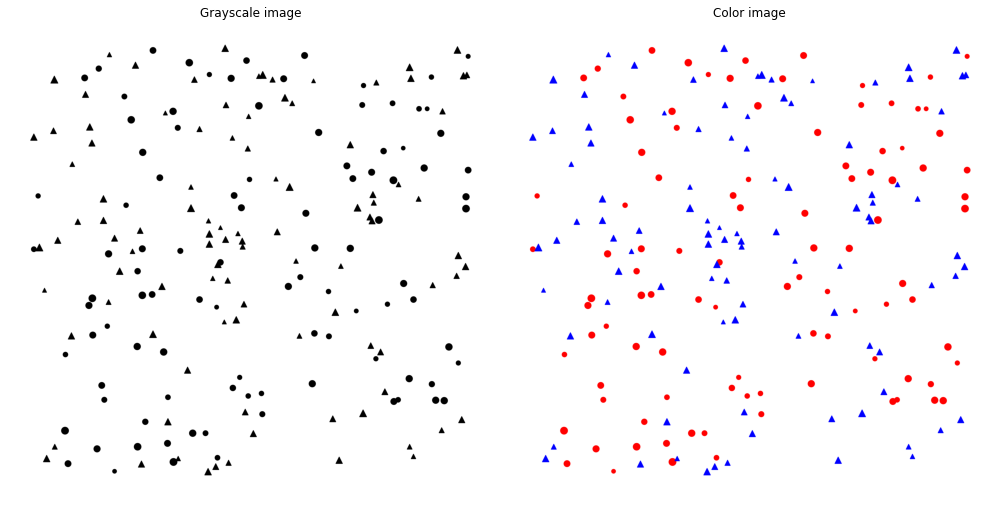

In [2]:
import matplotlib.pyplot as plt
import skimage as sk 
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import rgb2gray

I = sk.io.imread('/content/Patterns_BW.png',as_gray=True) # read image as grayscale (no color information)

IC = sk.io.imread('/content/Patterns_RGB.png') # read image as color (to define object class labels: triangle, circle)

fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I,cmap=plt.cm.gray)
ax[0].set_title('B&W image') 
ax[1].imshow(IC,cmap=plt.cm.jet)
ax[1].set_title('Color image') # set figure title

ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

In [4]:
IC.shape

(5556, 5700, 4)

# 3. Labelling and feature extraction

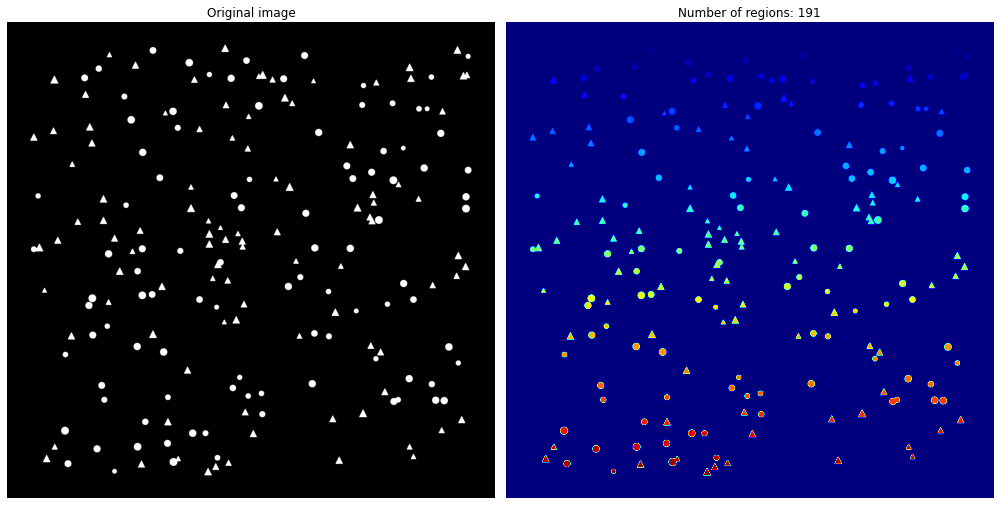

In [5]:
bw = np.logical_not(I==1)# Set regions white and background black
# label image regions:
label_image, nregions = label(bw,return_num=True)

# Segmentation figure:
fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(bw,cmap=plt.cm.gray)
ax[0].set_title('Original image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

# Get regional properties:
from skimage.measure import regionprops
props = regionprops(label_image)


In [7]:
# Get relevant features (eccentricity and area, for instance)
features = np.zeros((nregions,2))
labels = np.zeros(nregions)
# Save class label of each object (1: triangle, 2:circle)
bw1 = np.array(IC[:,:,0]==0,dtype=np.uint8) # red channel
bw2 = np.array(IC[:,:,2]==0,dtype=np.uint8) # blue channel
for i in range(0,nregions):
    features[i,0] = props[i].eccentricity
    features[i,1] = props[i].area
    labels[i] = bw1[np.int(props[i].centroid[0]),np.int(props[i].centroid[1])]+2*bw2[np.int(props[i].centroid[0]),np.int(props[i].centroid[1])]
    print('region = {} eccentridicy = {}, area = {}, label = {}'.format(i,features[i,0],features[i,1],labels[i] ))



region = 0 eccentridicy = 0.48610655597232594, area = 4226.0, label = 1.0
region = 1 eccentridicy = 0.48942592249149386, area = 4417.0, label = 1.0
region = 2 eccentridicy = 0.06441663231038412, area = 4991.0, label = 2.0
region = 3 eccentridicy = 0.03515408603956202, area = 5238.0, label = 2.0
region = 4 eccentridicy = 0.47962776321757783, area = 2257.0, label = 1.0
region = 5 eccentridicy = 0.07170550839046222, area = 2785.0, label = 2.0
region = 6 eccentridicy = 0.05953679909219687, area = 4740.0, label = 2.0
region = 7 eccentridicy = 0.07772084253780782, area = 6223.0, label = 2.0
region = 8 eccentridicy = 0.4872028427347642, area = 3950.0, label = 1.0
region = 9 eccentridicy = 0.4907731964569527, area = 4510.0, label = 1.0
region = 10 eccentridicy = 0.029662660633738996, area = 4316.0, label = 2.0
region = 11 eccentridicy = 0.6910189093209158, area = 6455.0, label = 1.0
region = 12 eccentridicy = 0.6926561186157153, area = 6726.0, label = 1.0
region = 13 eccentridicy = 0.021172677

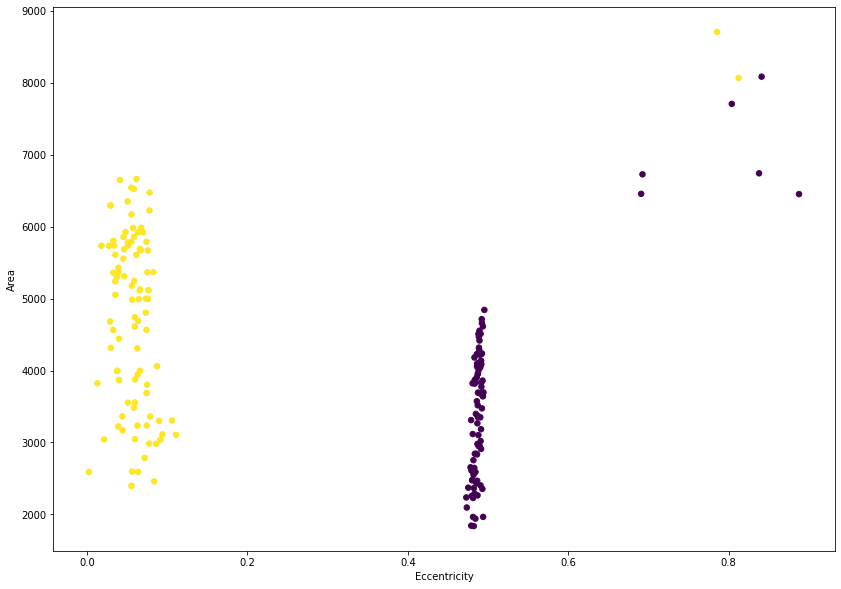

In [8]:
fig = plt.figure(figsize=(14,10))
plt.scatter(features[:,0], features[:,1], s=30, c=labels,marker = 'o')
plt.xlabel('Eccentricity')
plt.ylabel('Area')
plt.show()

## 4. Fit Linear Discriminant Analysis (LDA):

Using object features (eccentricity, area) and object class (triangle, circle): Train classifier with the first NTRAIN observations. Fit a LDA classifier using object features (eccentricity, area) and object class (triangle, circle): Train classifier with the first NTRAIN observations:

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

NTRAIN = 50 # Train with NTRAIN objects

clf = LinearDiscriminantAnalysis()
clf.fit(features[0:NTRAIN,:], labels[0:NTRAIN])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Estimated class-dependent centroids:

In [29]:
clf.means_

array([[5.02859017e-01, 3.66396296e+03],
       [5.38841159e-02, 4.56039130e+03]])

Visualize training data:

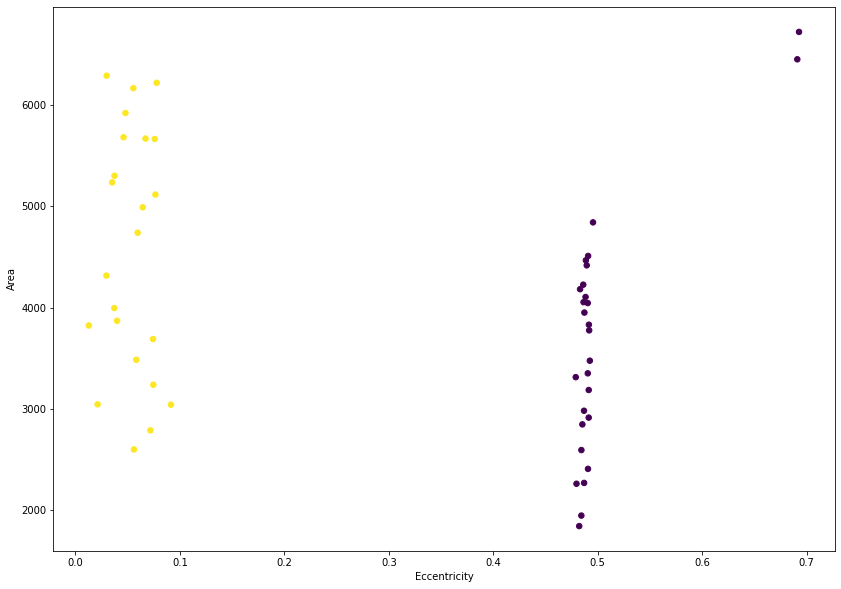

In [34]:
fig = plt.figure(figsize=(14,10))
plt.scatter(features[0:NTRAIN,0], features[0:NTRAIN,1], s=30, c=labels[0:NTRAIN],marker = 'o')
plt.xlabel('Eccentricity')
plt.ylabel('Area')
plt.show()

Visualize test data

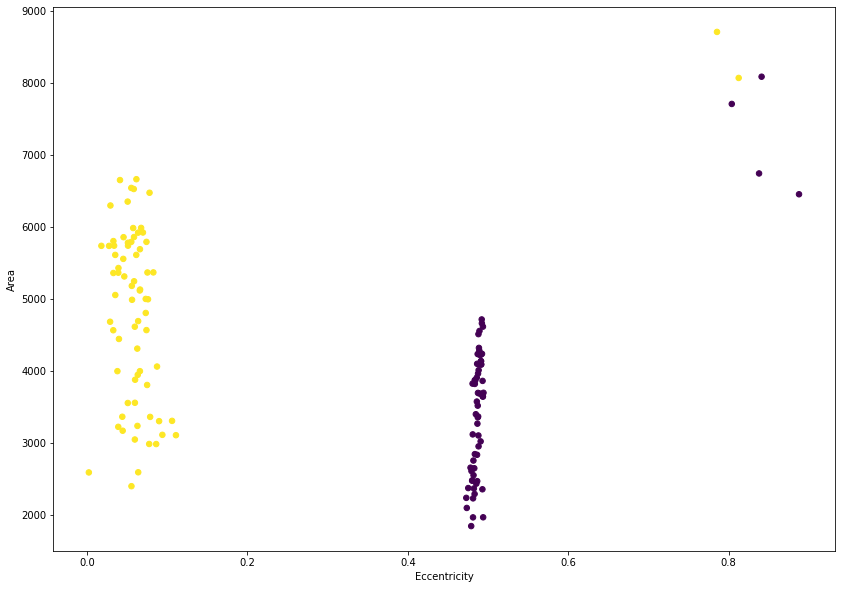

In [35]:
fig = plt.figure(figsize=(14,10))
plt.scatter(features[NTRAIN+1:-1,0], features[NTRAIN+1:-1,1], s=30, c=labels[NTRAIN+1:-1],marker = 'o')
plt.xlabel('Eccentricity')
plt.ylabel('Area')
plt.show()

Evaluate performance using Test dataset:

In [30]:
labels_pred = clf.predict(features[NTRAIN+1:-1])
labels_true = labels[NTRAIN+1:-1]

In [31]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(labels_true,labels_pred)
CM

array([[67,  0],
       [ 2, 70]])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(labels_true,labels_pred))

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.99        67
         2.0       1.00      0.97      0.99        72

    accuracy                           0.99       139
   macro avg       0.99      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139



We can try now with a KNN classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier




In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(features[0:NTRAIN,:], labels[0:NTRAIN])
labels_pred_knn = knn.predict(features[NTRAIN+1:-1])

CM = confusion_matrix(labels_true,labels_pred_knn)
CM

array([[55, 12],
       [28, 44]])

**The reason why this classifier provides such very bad performance is the following: In the KNN algorithm, when finding the nearest neighbors you need to compute the euclidean distance between observations. In the particular case of this problem, the feature area takes much higher values than eccentricity and therefore contributes much more than eccentricity in the euclidean distance. As the area is not a very good variable to discriminate between classes, the result is that the classifier is wrong in many of the cases**


Now try a Gaussian Naive Bayes classifer

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(features[0:NTRAIN,:], labels[0:NTRAIN])
labels_pred_gnb = gnb.predict(features[NTRAIN+1:-1])

CM = confusion_matrix(labels_true,labels_pred_gnb)
CM

array([[67,  0],
       [ 2, 70]])